WEEK 2 CLIMATE AND DISASTER MANAGEMENT SUBMISSION

Problem Statement:  Global climate patterns are changing, leading to unusual temperature fluctuations that may indicate extreme weather events, climate shifts, or environmental hazards. Traditional statistical methods often fail to detect subtle anomalies in large-scale historical climate data, especially when dealing with multiple variables (e.g., land temperature, ocean temperature, regional variations).

This project aims to develop a machine learning-based anomaly detection system to identify unusual temperature spikes over time. Using algorithms like Isolation Forest or Autoencoders, the system will analyze historical temperature datasets and flag anomalies that deviate significantly from established climate patterns.

---
Brief Introduction

Climate anomalies, such as unexpected temperature rises or drops, are critical indicators of potential climate-related risks. Detecting these anomalies early helps researchers, policymakers, and disaster management authorities anticipate extreme weather events, improve forecasting, and implement preventive measures.

This project leverages machine learning techniques to analyze historical temperature datasets (e.g., NASA GISTEMP, NOAA, or Kaggle's Global Temperature Anomalies dataset) and detect abnormal patterns. By applying anomaly detection methods, the system can identify temperature shifts that exceed normal variability, supporting climate monitoring and decision-making processes.

---





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_csv("/content/hadcrut-monthly-ns-avg.csv")

In [ ]:
print(df.head())

   1900-01-01  -0.266  -0.343  -0.200  -0.371  -0.160  -0.543  0.012  -0.399  \
0  1900-02-01  -0.172  -0.261  -0.105  -0.279  -0.065  -0.406  0.062  -0.312   
1  1900-03-01  -0.285  -0.368  -0.214  -0.389  -0.182  -0.494 -0.076  -0.420   
2  1900-04-01  -0.261  -0.328  -0.188  -0.372  -0.150  -0.447 -0.075  -0.398   
3  1900-05-01  -0.273  -0.372  -0.201  -0.381  -0.164  -0.464 -0.081  -0.409   
4  1900-06-01  -0.180  -0.274  -0.104  -0.289  -0.071  -0.354 -0.006  -0.314   

   -0.138  -0.574  0.039  
0  -0.043  -0.447  0.094  
1  -0.158  -0.535 -0.040  
2  -0.126  -0.492 -0.031  
3  -0.142  -0.507 -0.041  
4  -0.047  -0.399  0.040  


In [3]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])
df.rename(columns={df.columns[0]: "Date"}, inplace=True)


In [ ]:
print(df.describe())

            -0.266       -0.343       -0.200       -0.371       -0.160  \
count  1463.000000  1463.000000  1463.000000  1463.000000  1463.000000   
mean      0.020379    -0.029266     0.067374    -0.036178     0.076912   
std       0.338737     0.349277     0.331018     0.356409     0.321777   
min      -0.832000    -0.910000    -0.745000    -0.926000    -0.738000   
25%      -0.214500    -0.274500    -0.158500    -0.289000    -0.143000   
50%      -0.029000    -0.067000     0.015000    -0.084000     0.031000   
75%       0.221000     0.182500     0.254000     0.177000     0.261500   
max       1.111000     1.062000     1.155000     1.084000     1.138000   

            -0.543        0.012       -0.399       -0.138       -0.574  \
count  1463.000000  1463.000000  1463.000000  1463.000000  1463.000000   
mean     -0.139973     0.180735    -0.055444     0.095488    -0.158206   
std       0.353749     0.327718     0.357780     0.321440     0.360539   
min      -1.024000    -0.640000    -0

In [4]:
print("\nData Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1463 non-null   object 
 1   -0.266  1463 non-null   float64
 2   -0.343  1463 non-null   float64
 3   -0.200  1463 non-null   float64
 4   -0.371  1463 non-null   float64
 5   -0.160  1463 non-null   float64
 6   -0.543  1463 non-null   float64
 7   0.012   1463 non-null   float64
 8   -0.399  1463 non-null   float64
 9   -0.138  1463 non-null   float64
 10  -0.574  1463 non-null   float64
 11  0.039   1463 non-null   float64
dtypes: float64(11), object(1)
memory usage: 137.3+ KB
None

Missing values:
Date      0
-0.266    0
-0.343    0
-0.200    0
-0.371    0
-0.160    0
-0.543    0
0.012     0
-0.399    0
-0.138    0
-0.574    0
0.039     0
dtype: int64


In [6]:
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0])


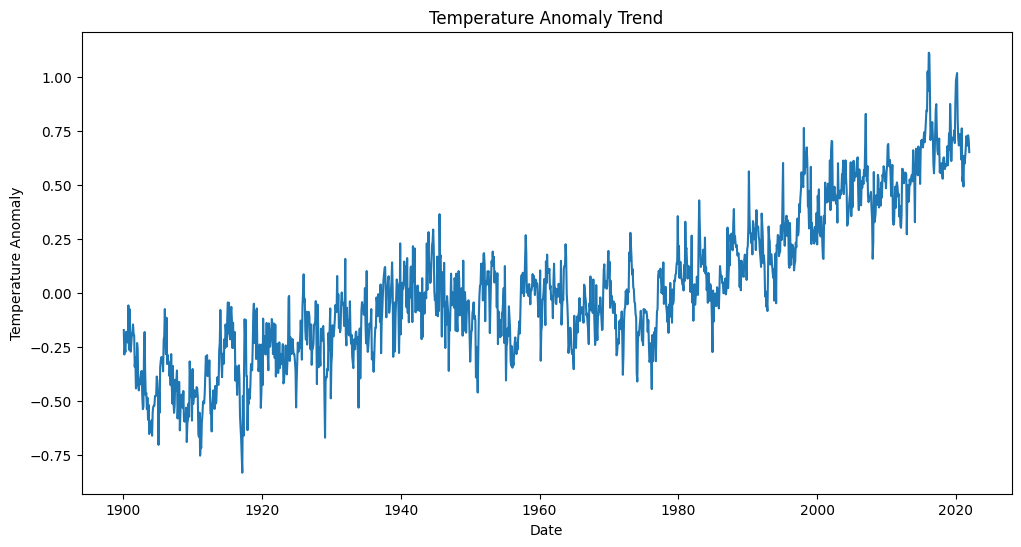

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.title("Temperature Anomaly Trend")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.show()



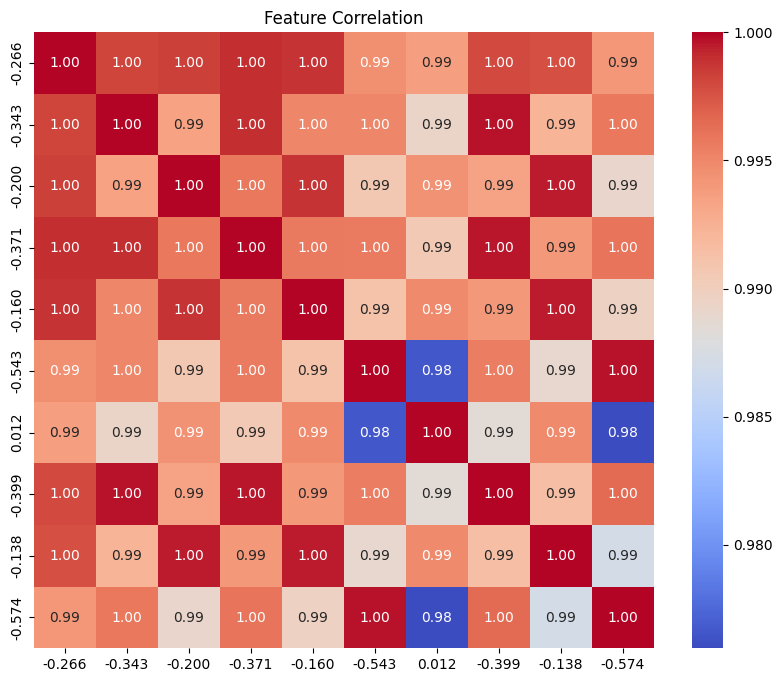

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 1:-1].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [12]:

df['Mean_Temp_Anomaly'] = df.iloc[:, 1:].mean(axis=1)


print(df.columns)


from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.02, random_state=42)
df['Anomaly'] = model.fit_predict(df[['Mean_Temp_Anomaly']])


Index(['Date', '-0.266', '-0.343', '-0.200', '-0.371', '-0.160', '-0.543',
       '0.012', '-0.399', '-0.138', '-0.574', '0.039', 'Mean_Temp_Anomaly'],
      dtype='object')


In [13]:
df['Anomaly_Score'] = model.decision_function(df[['Mean_Temp_Anomaly']])

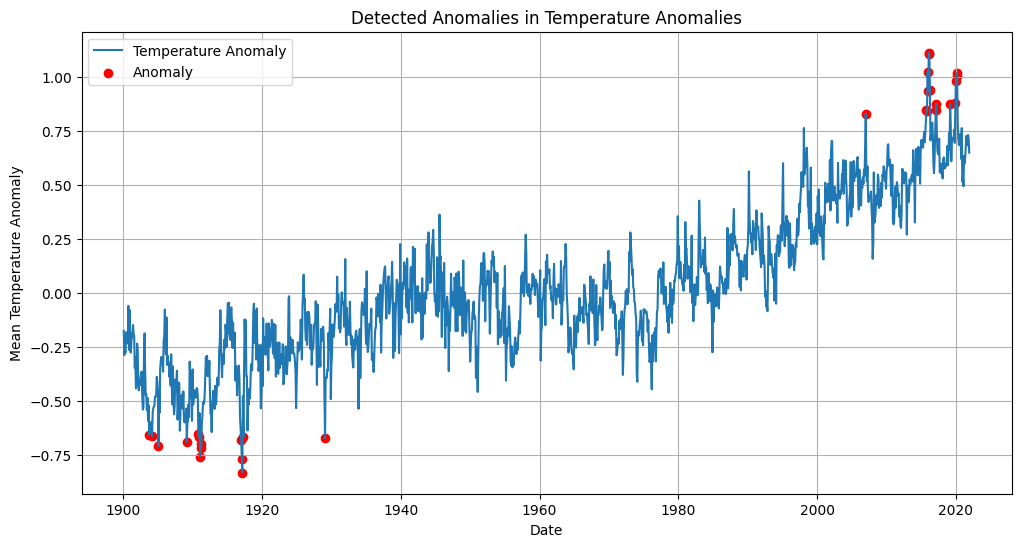

In [14]:
plt.figure(figsize=(12, 6))
a = df.loc[df['Anomaly'] == -1, ['Date', 'Mean_Temp_Anomaly']]
plt.plot(df['Date'], df['Mean_Temp_Anomaly'], label='Temperature Anomaly')
plt.scatter(a['Date'], a['Mean_Temp_Anomaly'], color='red', label='Anomaly')
plt.title("Detected Anomalies in Temperature Anomalies")
plt.xlabel("Date")
plt.ylabel("Mean Temperature Anomaly")
plt.legend()
plt.grid()
plt.show()

In [15]:
print("Total anomalies detected:", df[df['Anomaly'] == -1].shape[0])
print("\nAnomalies overview:")
print(df[df['Anomaly'] == -1][['Date', 'Mean_Temp_Anomaly']])


Total anomalies detected: 29

Anomalies overview:
           Date  Mean_Temp_Anomaly
44   1903-10-01          -0.654273
49   1904-03-01          -0.661909
60   1905-02-01          -0.708909
109  1909-03-01          -0.689909
129  1910-11-01          -0.654091
130  1910-12-01          -0.667091
132  1911-02-01          -0.756182
133  1911-03-01          -0.699182
134  1911-04-01          -0.714364
203  1917-01-01          -0.679364
204  1917-02-01          -0.765545
205  1917-03-01          -0.830727
207  1917-05-01          -0.666364
348  1929-02-01          -0.671182
1283 2007-01-01           0.828909
1388 2015-10-01           0.845636
1389 2015-11-01           0.841000
1390 2015-12-01           1.022091
1391 2016-01-01           0.934455
1392 2016-02-01           1.110182
1393 2016-03-01           1.103909
1394 2016-04-01           0.936091
1404 2017-02-01           0.844455
1405 2017-03-01           0.873273
1429 2019-03-01           0.872909
1438 2019-12-01           0.877818
1439 